# **CIS 4190/5190 Homework 2 - Fall 2024**

In [2]:
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## **PennGrader Setup**
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**.

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database.

In [3]:
%%capture
!pip install penngrader-client

In [4]:
%%writefile student_config.yaml
grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting student_config.yaml


In [5]:
from penngrader.grader import *

## **Autograder Setup**
Enter your 8-digit PennID below:

In [6]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 9999999999999       # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [7]:
# leave cis5190_fall24_HW22 as it is
grader = PennGrader('student_config.yaml', 'cis5190_fall24_HW22', STUDENT_ID, STUDENT_ID)
# import requests
# URL = "http://52.90.101.233:80/submit"

PennGrader initialized with Student ID: 41855518

Make sure this correct or we will not be able to store your grade


In [8]:
# Serialization code needed by the autograder
import inspect, sys
from IPython.core.magics.code import extract_symbols

def new_getfile(object, _old_getfile=inspect.getfile):
    if not inspect.isclass(object):
        return _old_getfile(object)

    # Lookup by parent module (as in current inspect)
    if hasattr(object, '__module__'):
        object_ = sys.modules.get(object.__module__)
        if hasattr(object_, '__file__'):
            return object_.__file__

    # If parent module is __main__, lookup by methods (NEW)
    for name, member in inspect.getmembers(object):
        if inspect.isfunction(member) and object.__qualname__ + '.' + member.__name__ == member.__qualname__:
            return inspect.getfile(member)
    else:
        raise TypeError('Source for {!r} not found'.format(object))
inspect.getfile = new_getfile

def grader_serialize(obj):
    cell_code = "".join(inspect.linecache.getlines(new_getfile(obj)))
    class_code = extract_symbols(cell_code, obj.__name__)[0][0]
    return class_code

## **Datasets**
Next, we will download all datasets from Google Drive to your local runtime. After successful download, you may verify that all datasets are present in your colab instance.

HW1 Datasets:
- [cis519_hw1_diabetes_train.csv](https://drive.google.com/file/d/1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx/view?usp=sharing)
- [cis519_hw1_diabetes_test.csv](https://drive.google.com/file/d/14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO/view?usp=sharing)

In [9]:
if not os.path.exists("cis519_hw1_diabetes_train.csv"):
    !gdown --id 1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx
if not os.path.exists("cis519_hw1_diabetes_X_test.csv"):
    !gdown --id 14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO

In [10]:
train_df = pd.read_csv("cis519_hw1_diabetes_train.csv")
train_df

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,DIABETIC,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,...,DMDEDUC2,RIDAGEYR,LBXTC,ALQ120Q,BMXWAIST,BPQ020,RIDRETH1,BMXLEG,RIAGENDR,BMXHT
0,NaN,1.52,28.0,NaN,0,NaN,0.0,0.0,20.2,59.2,...,NaN,18,154.0,NaN,75.5,2.0,5,42.0,1,171.0
1,NaN,3.09,28.0,NaN,0,NaN,NaN,NaN,21.1,61.8,...,3.0,57,224.0,1.0,90.7,2.0,2,39.0,2,171.0
2,NaN,5.00,29.0,NaN,0,NaN,NaN,NaN,22.1,63.1,...,4.0,29,170.0,2.0,81.2,2.0,2,40.0,2,169.0
3,NaN,5.00,NaN,NaN,0,NaN,NaN,NaN,NaN,6.8,...,NaN,0,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,NaN,2.13,31.0,NaN,0,NaN,NaN,0.0,21.7,65.8,...,3.0,61,115.0,7.0,77.2,1.0,3,41.5,1,174.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,5,NaN,2,NaN
8136,NaN,1.29,31.0,NaN,0,NaN,NaN,0.0,30.6,87.9,...,1.0,79,184.0,0.0,117.5,2.0,1,39.0,1,169.4
8137,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,31.7,90.4,...,NaN,17,NaN,NaN,108.7,2.0,4,41.7,2,168.9
8138,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2.0,58,NaN,NaN,NaN,2.0,4,NaN,1,NaN


#### **NOTE: Results of sections marked as "manually graded" should be submitted along with the written homework solutions.**

# **1. Logistic Regression [23pts]**

## **1.1. Logistic Regression Implementation [18 pts, autograded]**

Implement logistic regression with both L1 and L2 regularization by completing the LogisticRegression class.  

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `has_converged(theta_old, theta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LogisticRegression class. **DO NOT** change the API.

---

### **1.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **1.1.2. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where
> $
h_{\theta}(x_{i}) = \sigma(\theta^{T}x_{i})
$


L1 Regularisation Loss:
>$
\mathcal{L1}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L2}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **1.1.3. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **1.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 2.1.5 for convergence condition.

---

### **1.1.5. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **1.1.7. Predict [2 pts]**

The `predict` function should predict the classes of the data points in a given input data matrix.

In [11]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration

    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, theta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.penalty = penalty
        self.lambd = lambd
        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def get_params(self, deep=True):
        # a function needed for using cross_val_score function from sklearn.model_selection
        return {"alpha": self.alpha, "max_iter": self.max_iter, "lambd" : self.lambd, "penalty" : self.penalty}

    def sigmoid(self, x):
        

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # TODO START: Complete the function
        # TODO END
        
        return 1 /(1 + np.exp(-x))

    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # DO NOT use np.dot for this function as it can possibly return nan. Use a combination of np.nansum and np.multiply.

		
  
        # CASE 1: NO PENALTY
        h_term = self.sigmoid(X @ theta)
        component_1 = np.multiply(y, np.log(h_term))
        component_2 = np.multiply((1-y), np.log(1-h_term))
        nll = -1 * np.nansum(component_1 + component_2)
        
        if not self.penalty:
            return nll
        
        regularization = None
        # CASE 2: L1 PENALTY
        if self.penalty == 'l1': 
            regularization = self.lambd * np.sum(np.abs(theta[1:]))
        
        if self.penalty == 'l2': 
            regularization = self.lambd * np.sum(np.square(theta[1:]))
        # CASE 3: L2 PENALTY

        # TODO END
        return nll + regularization

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        y_pred = self.sigmoid(X @ theta)
        nll_gradient = X.T @ (y_pred - y)
        
        if not self.penalty: 
            print(nll_gradient)
            return nll_gradient
        
        regularization = np.zeros_like(theta)
        
        if self.penalty=="l1": 
            regularization[1:] = np.multiply(self.lambd, np.sign(theta[1:]))
        
        if self.penalty=='l2': 
            regularization[1:] = np.multiply(2*self.lambd, theta[1:])
            
        
        return nll_gradient + regularization
		
        # TODO END

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        return np.linalg.norm(theta_new - theta_old) < self.tol

        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])

        # TODO START: Complete the function
        for _ in range(self.max_iter):
            theta_new = theta_old - self.alpha * self.compute_gradient(theta_old, X, y)
            
            self.hist_theta_ = np.vstack((self.hist_theta_, theta_new))
            
            cost = self.compute_cost(theta_new, X, y)
            self.hist_cost_ = np.append(self.hist_cost_, cost)
            
            if self.has_converged(theta_old, theta_new): 
                break 
            
            theta_old = theta_new
        self.theta_ = theta_old

        # TODO END

    def predict_proba(self, X):

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))        
        return self.sigmoid(X @ self.theta_)

    def predict(self, X):

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        # TODO START: Complete the function
        return (self.predict_proba(X) >= 0.5).astype(int)

        # TODO END

In [12]:
def test_log_reg_sigmoid(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_sigmoid(LogisticRegression)

In [13]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_sigmoid', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [14]:
def test_log_reg_compute_cost(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.467975765663204

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.52915138076548

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

test_log_reg_compute_cost(LogisticRegression)

In [15]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_cost', answer = grader_serialize(LogisticRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [16]:
def test_log_reg_compute_gradient(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_compute_gradient(LogisticRegression)

[ 2.60573737 -2.20203139]


In [17]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_gradient', answer = grader_serialize(LogisticRegression))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [18]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

test_log_reg_has_converged(LogisticRegression)

In [19]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_has_converged', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [20]:
def test_log_reg_fit(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_fit(LogisticRegression)

[-0.5         0.59750334 -0.56432509]
[-0.50681255  0.58696047 -0.55432483]
[-0.51330849  0.57676191 -0.54469788]
[-0.51949953  0.56689546 -0.53543063]
[-0.52539704  0.5573493  -0.52650988]


In [21]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_fit', answer = grader_serialize(LogisticRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [22]:
def test_log_reg_predict_proba(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_predict_proba(LogisticRegression)

[-0.5         0.59750334 -0.56432509]
[-0.50681255  0.58696047 -0.55432483]
[-0.51330849  0.57676191 -0.54469788]
[-0.51949953  0.56689546 -0.53543063]
[-0.52539704  0.5573493  -0.52650988]


In [23]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict_proba', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [24]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

test_log_reg_predict(LogisticRegression)

[ 2.         -0.05480281 -6.79432462]
[ 1.73724046 -0.23862791 -6.03116271]
[ 1.51359677 -0.38359017 -5.36229909]
[ 1.32378969 -0.4954537  -4.77763114]
[ 1.1627102  -0.57976122 -4.26672689]


In [25]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict', answer = grader_serialize(LogisticRegression))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.2. Effect of learning rate on gradient descent [5 pts, manually graded]**



Run the below cell to download the dataset.

In [26]:
if not os.path.exists("cis519_hw2_admit.csv"):
    !gdown --id 1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh

train_df = pd.read_csv("cis519_hw2_admit.csv")

The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.1, 0.25}, fit a logistic regression model to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

In [27]:
train_df.head()

,Exam 1 Score,Exam 2 Score,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [28]:
# TODO START: Plot the effect of learning rate on gradient descent
from sklearn.preprocessing import StandardScaler

def fit_learning_rates(data, learning_rates): 
    
    X = train_df.iloc[:, :-1].values
    y = train_df.iloc[:, -1].values  
    
    lr_dict = {}
    
    for lr in learning_rates:
        standard = StandardScaler()
        X_scaled = standard.fit_transform(X)
        
        model = LogisticRegression(alpha=lr, max_iter=100, lambd=0.001, penalty="l2")
        model.fit(X_scaled, y)

        lr_dict[lr] = model.hist_cost_
        
    return lr_dict

# TODO END

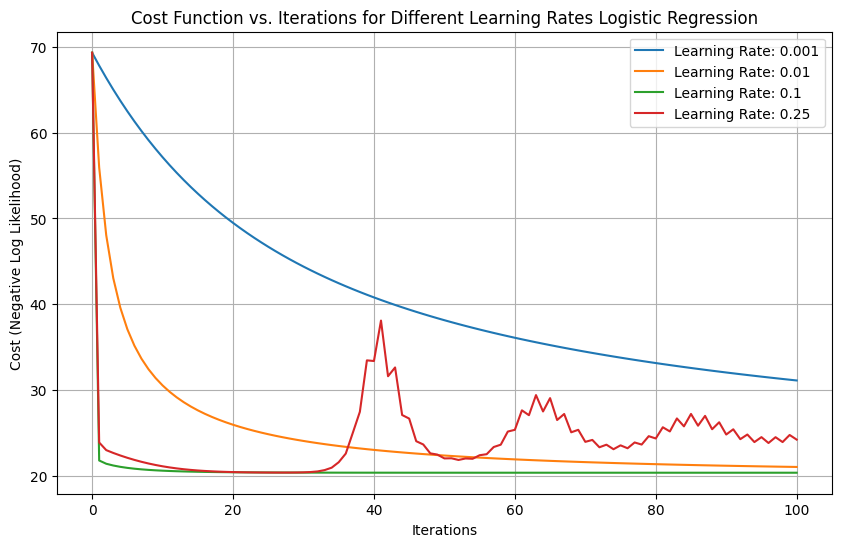

In [29]:
lrs = [0.001, 0.01, 0.1, 0.25]
lr_dict = fit_learning_rates(train_df, lrs) 

plt.figure(figsize=(10,6)) 
for lr in lrs:
    plt.plot(range(len(lr_dict[lr])), lr_dict[lr], label=f"Learning Rate: {lr}")
    
plt.title('Cost Function vs. Iterations for Different Learning Rates Logistic Regression')
plt.xlabel('Iterations')
plt.ylabel('Cost (Negative Log Likelihood)')
plt.legend()
plt.grid()
plt.show()

# **2. K-Nearest Neighbors [10 pts]**
While doing classification, KNN searches the memorized training instances for the K instances that most closely resemble the new instance and assigns to it the most common class. An alternate way of understanding KNN is by looking at the learned decision boundaries. In this problem, you will implement a function to classify points in the X-Y coordinates using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The training dataset used is the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), and each point in the 2d-space will be classified into one of the three classes using its x-coordinate(sepal length) and y-coordinate(sepal width).

## **2.1. Load Iris Dataset**
Please complete the load_dataset function to
- Populate X_train with iris dataset features. We use only the sepal length and width for this exercise, i.e. the first two columns in the dataset
- Populate y_train with labels (species)
- return X_train and y_train

In [30]:
from sklearn import datasets

def load_iris_dataset():
    '''
    Args:
        None
    Returns: X_train, y_train
    Notes:
        1. Please do not change the provided code
    '''
    # import training data
    iris = datasets.load_iris()

    # TODO START: Examine the iris variable and initialize the following variables appropriately:
    # 1. X_train - Shape (m, 2): Only use the sepal length and width
    # 2. y_train - Shape (m, ): target labels
    X_train = iris.data[:, :2]
    y_train = iris.target
    
    return X_train, y_train

    # TODO END

# Load the iris dataset first
X_train, y_train = load_iris_dataset()

## **2.2. Standardise the Features [4 pts, autograded]**
Please complete the standardise_features function to
standardize the features by subtracting the mean and scaling to unit variance. i.e

 z = (x - u) / s

where u is the mean of the training data and s is the standard deviation of the training data.

Here, centering and scaling need to happen independently on each feature (column) of the training data.

**Note**:

Please implement this function yourself.

**Do NOT use sklearn's StandardScaler**.

You are encouraged to use numpy as well as numpy vectorisation/broadcasting techniques to speed up the calculations.

In [31]:
def standardise_features(X_train):

  '''
  Args:
      X_train: Training dataset
  Returns: X_train (After Standardization)
  Notes:
      1. Please do not change the provided code
  '''

  # TODO START:
  # 1. Calculate columnwise means and standard deviations
  # 2. Perform columnwise standardisation i.e. subtract off mean and divide by standard deviation
  # 3. Return the standardised data
  column_means = np.mean(X_train, axis=0)
  column_sd = np.std(X_train, axis=0)
  
  standard_data = (X_train - column_means) / column_sd
  return standard_data

  # TODO END
  

X_train = standardise_features(X_train)

In [32]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_knn_standardise', answer = grader_serialize(standardise_features))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.3. Plot KNN Decision Boundary [6 pts, manually graded]**
Please complete the plot_KNN_boundary function to
- train a KNN classifier with k neighbors using the provided X_train and y_train
- make predictions using X_test and save the result as 'y_test'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN_boundary(k, X_train, y_train):
    '''
    Args:
        k: Number of neighbors to use for kneighbors queries.
        X_train: Training dataset
        y_train: Labels

    Returns:
    Notes:
        1. Please do not change the provided code
        2. save the predicted labels as y_test for plotting
    '''

    # Mesh 2d space into grid to generate X_test and y_test
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # TODO START:
    # 1. train a KNN classifier
    # 2. save the predictions on X_test in y_test
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_test = knn.predict(X_test)

    # TODO END

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Also plot the training points
    iris_target_names = ['setosa', 'versicolor', 'virginica']
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=map(lambda y: iris_target_names[y], y_train),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel("standardised sepal length")
    plt.ylabel("standardised sepal width")
    plt.show()

Explore the effect of changing k on the learned decision boundaries.
- Submit the plots along with the written homework solutions.
- State whether the model underfits/overfits as k increases and explain why.

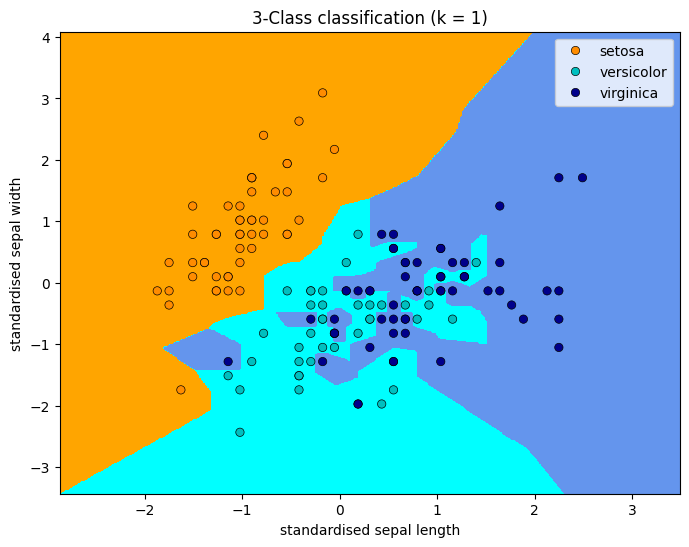

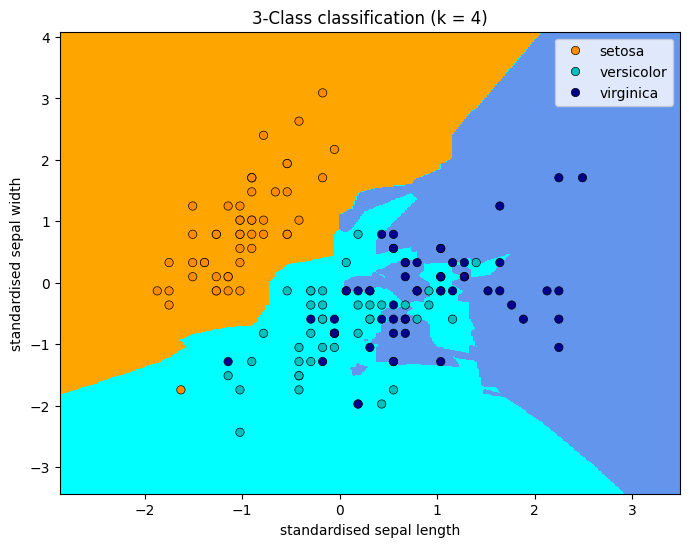

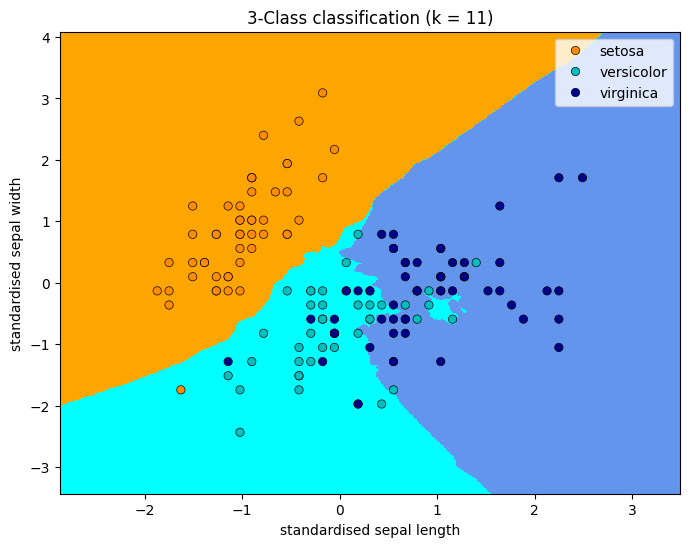

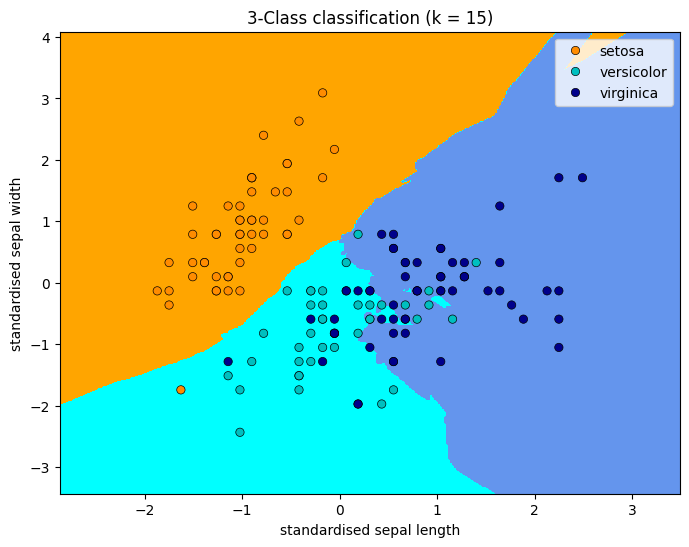

In [34]:
# Plot KNN decision boundaries with different k values
def visualize_KNN(X_train, y_train):

    k_list = [1, 4, 11, 15]

    # TODO START: Call plot_KNN_boundary function for each value of k in k_list
    for k in k_list: 
        plot_KNN_boundary(k, X_train, y_train)

    # TODO END

visualize_KNN(X_train, y_train) ### Comment out this line when submitting ###

# **3. Measures of Impurity and their Reduction [15 pts]**
To grow a classification tree, instead of a binary error (1/0), measures of impurity are used to see how good a leaf node is. Recall that we discussed about entropy being one such measure of impurity. We will be working with entropy and comparing it to another metric called the gini index.

## **3.1. Measures of Impurity [9 pts]**

For this problem, consider that you have a binary classification problem of two classes, the positive class $1$ and the negative class $0$.



### **3.1.1. Entropy [2 pts, autograded]**

Please complete the entropy function.

In [35]:
import numpy as np
import random
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):

    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        ce: The cross-entropy value for the node
    """

    # TODO START: Complete the function
    cross_entropy = -1 * ((prob_class1 * np.log2(prob_class1)) + ((1-prob_class1) * np.log2(1-prob_class1)))
    return cross_entropy

    # TODO END

assert cross_entropy(0.5) == 1

In [36]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_cross_entropy', answer = grader_serialize(cross_entropy))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.1.2. Gini Index [2 pts, autograded]**

Gini index is another measure of impurity. For an K-class classification problem, gini index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the gini index of a binary-class problem (k = 2).

In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1):

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        gi: The gini-index value for the node
    """

    # TODO START: Complete the function
    gini = prob_class1 * (1 - prob_class1) + (1 - prob_class1) * prob_class1
    return gini

    # TODO END

assert gini_index(0.5) == 0.5

In [38]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_index', answer = grader_serialize(gini_index))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.1.2. Plot [5 pts, manually graded]**

Please complete the impurity_measures_plot function and generate a plot of the entropy and gini index values with respect to the class 1 probability values. Both the impurity measures should be on the same plot.

- Submit the generated plot along with the written homework solutions.
- Make sure the plot has a title, legend and axes labels.
- Comment on why cross entropy and gini index are suitable measures of impurity based on the plot.

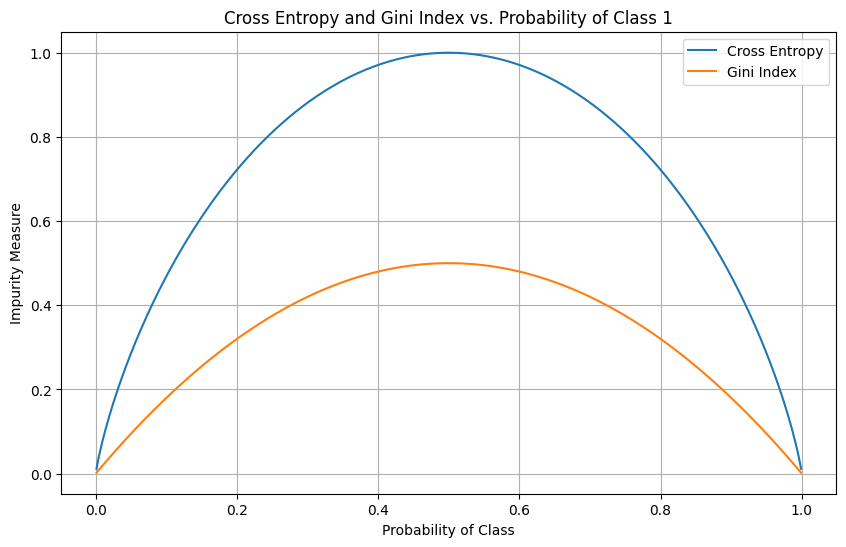

In [39]:
def impurity_measures_plot():

    '''
    Plots the cross entropy and gini index values with respect to the probability values of class 1.

    Args:

    Returns:

    Notes:
        1. Please do not change the provided code
        2. Both cross entropy and gini index should be on the same scatter plot
    '''

    prob_class1_arr = np.arange(1, 1000)/1000
    ce_arr = np.array([cross_entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # TODO START: Complete the function
    plt.figure(figsize=(10,6))
    plt.plot(prob_class1_arr, ce_arr, label='Cross Entropy')
    plt.plot(prob_class1_arr, gi_arr, label='Gini Index')
    plt.xlabel('Probability of Class')
    plt.ylabel('Impurity Measure')
    plt.title('Cross Entropy and Gini Index vs. Probability of Class 1')
    plt.grid()
    plt.legend()
    plt.show()


    # TODO END

impurity_measures_plot()

## **3.2. Reduction in Impurity [6 pts]**

Recall that we also discussed information gain which is the change in entropy from the parent node to the children nodes. Gini reduction is similar to information gain except you replace entropy values with gini index.

### **3.2.1. Information Gain [3 pts, autograded]**

In [40]:
def information_gain(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # TODO START: Complete the function
    # 1. You will need to calculate cross-entropy for the parent and child nodes
    # 2. Use the above entropies to finally calculate information gain
    p_class1_parent = num_class1_parent/num_samples_parent
    cross_entropy_parent = cross_entropy(p_class1_parent)
    cross_entropy_child1 = cross_entropy(num_class1_child1/num_samples_child1)
    p_child1 = num_samples_child1/num_samples_parent
    
    num_samples_child2 = num_samples_parent - num_samples_child1
    p_child2 = (num_samples_child2)/num_samples_parent
    num_class1_child2 = num_class1_parent - num_class1_child1
    p_class1_child2 = num_class1_child2 / num_samples_child2 if num_samples_child2 > 0 else 0
    entropy_child2 = cross_entropy(p_class1_child2)
    
    weighted_entropy_children = p_child1 * cross_entropy_child1 + p_child2 * entropy_child2
    
    return cross_entropy_parent - weighted_entropy_children

    # TODO END


assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01

In [41]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_information_gain', answer = (grader_serialize(cross_entropy), grader_serialize(information_gain)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **3.2.2. Gini Reduction [3 pts, autograded]**

In [42]:
def gini_reduction(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # TODO START: Complete the function
    gini_parent = gini_index(num_class1_parent/num_samples_parent)
    
    gini_child1 = gini_index(num_class1_child1/num_samples_child1)
    
    num_samples_child2 = num_samples_parent - num_samples_child1 
    num_class1_child2 = num_class1_parent - num_class1_child1 
    gini_child2 = gini_index(num_class1_child2/num_samples_child2)
    
    weighted_gini_children = (num_samples_child2/num_samples_parent)*gini_child2 + (num_samples_child1/num_samples_parent)*gini_child1
    
    return gini_parent - weighted_gini_children
    # TODO END

assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01

In [43]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_reduction', answer = (grader_serialize(gini_index), grader_serialize(gini_reduction)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **4. Decision Tree [35 pts]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` are the datasets that you would be using for training and testing respectively.

## **4.1. Load Datasets**

Read the files `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` into train_df and test_df respectively in the `load_diabetes_datasets` function.

In [92]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns:
        train_df, test_df
    '''

    # TODO START: Complete the function
    train_df = pd.read_csv("cis519_hw1_diabetes_train.csv")
    test_df = pd.read_csv("cis519_hw1_diabetes_X_test.csv")
    return train_df, test_df
    # TODO END

In [93]:
train_df, test_df = load_diabetes_datasets()

In [94]:
test_df.head()

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,BPAARM,ALQ120Q,BMXWAIST,BPQ020,DMDEDUC2,RIDRETH1,BMXLEG,RIAGENDR,RIDAGEYR,BMXHT,LBXTC
0,NaN,1.72,29.0,2.0,NaN,0.0,NaN,26.5,76.8,1.0,NaN,94.1,NaN,NaN,4,44.0,2,12,170.1,155.0
1,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,3,NaN,1,0,NaN,NaN
2,NaN,4.45,29.0,NaN,NaN,NaN,NaN,23.4,77.3,1.0,2.0,81.5,2.0,3.0,4,47.8,1,21,181.6,147.0
3,6.0,1.43,NaN,1.0,NaN,0.0,NaN,24.2,67.1,1.0,NaN,86.5,NaN,NaN,3,40.6,1,11,166.4,118.0
4,2.0,NaN,NaN,1.0,NaN,0.0,0.0,14.5,17.4,NaN,NaN,49.8,NaN,NaN,4,NaN,2,6,109.6,NaN


In [46]:
train_df.head()

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,DIABETIC,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,...,DMDEDUC2,RIDAGEYR,LBXTC,ALQ120Q,BMXWAIST,BPQ020,RIDRETH1,BMXLEG,RIAGENDR,BMXHT
0,NaN,1.52,28.0,NaN,0,NaN,0.0,0.0,20.2,59.2,...,NaN,18,154.0,NaN,75.5,2.0,5,42.0,1,171.0
1,NaN,3.09,28.0,NaN,0,NaN,NaN,NaN,21.1,61.8,...,3.0,57,224.0,1.0,90.7,2.0,2,39.0,2,171.0
2,NaN,5.00,29.0,NaN,0,NaN,NaN,NaN,22.1,63.1,...,4.0,29,170.0,2.0,81.2,2.0,2,40.0,2,169.0
3,NaN,5.00,NaN,NaN,0,NaN,NaN,NaN,NaN,6.8,...,NaN,0,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,NaN,2.13,31.0,NaN,0,NaN,NaN,0.0,21.7,65.8,...,3.0,61,115.0,7.0,77.2,1.0,3,41.5,1,174.2


In [47]:
train_df.isna().sum()

OHQ575Q     7988
INDFMPIR     629
LBDSGBSI    2887
OHQ565      5934
DIABETIC       0
OHX28CSC    7120
OHX19SE     5533
URDECPLC    5999
BMXBMI       878
BMXWT        364
BPAARM      2094
DMDEDUC2    3512
RIDAGEYR       0
LBXTC       2016
ALQ120Q     4543
BMXWAIST    1188
BPQ020      2959
RIDRETH1       0
BMXLEG      2191
RIAGENDR       0
BMXHT        868
dtype: int64

In [48]:
train_df.describe()

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,DIABETIC,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,...,DMDEDUC2,RIDAGEYR,LBXTC,ALQ120Q,BMXWAIST,BPQ020,RIDRETH1,BMXLEG,RIAGENDR,BMXHT
count,152.000000,7511.000000,5253.000000,2206.000000,8140.000000,1020.000000,2607.000000,2141.000000,7262.000000,7776.000000,...,4628.000000,8140.000000,6124.000000,3597.000000,6952.000000,5181.000000,8140.000000,5949.000000,8140.000000,7272.000000
mean,70.703947,2.265696,28.274129,1.950589,0.085135,13876.473529,2.635980,0.001868,25.684825,62.676942,...,3.519663,31.540295,179.840137,5.117042,87.271807,1.668983,3.093120,38.556413,1.514742,155.768501
std,810.632407,1.639569,4.437972,0.593087,0.279100,24277.748125,3.983347,0.043193,7.976654,32.267283,...,1.235524,24.354202,41.243279,38.297158,22.605163,0.524921,1.264086,4.057116,0.499813,23.193173
min,1.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.100000,3.300000,...,1.000000,0.000000,69.000000,0.000000,40.200000,1.000000,1.000000,24.400000,1.000000,79.700000
25%,3.000000,0.880000,25.000000,2.000000,0.000000,6.000000,0.000000,0.000000,19.700000,38.400000,...,3.000000,10.000000,151.000000,1.000000,71.200000,1.000000,2.000000,36.000000,1.000000,149.500000
50%,4.000000,1.720000,28.000000,2.000000,0.000000,69.000000,1.000000,0.000000,24.700000,65.300000,...,4.000000,26.000000,175.000000,2.000000,87.800000,2.000000,3.000000,38.600000,2.000000,161.900000
75%,6.000000,3.630000,31.000000,2.000000,0.000000,5689.000000,9.000000,0.000000,30.300000,83.600000,...,5.000000,52.000000,204.000000,4.000000,102.900000,2.000000,4.000000,41.300000,2.000000,170.900000
max,9999.000000,5.000000,65.000000,9.000000,1.000000,56789.000000,12.000000,1.000000,82.900000,222.600000,...,9.000000,80.000000,813.000000,999.000000,177.900000,9.000000,5.000000,51.900000,2.000000,202.600000


## **4.2. Preprocess Datasets [10 pts, autograded]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets.

### **4.2.1. Feature Selection**

For feature selection, you should retain the following features at least and experiment including/excluding the remaining features.

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` in the training dataset is the target variable.

### **4.2.2. Handling Missing Values**

We recommend you to drop rows with missing values in the training set. However, you should not drop rows with missing values in the test set. Instead, you should impute missing values in the test set with the mean of the corresponding columns in the training set.

In [49]:
train_df, test_df = load_diabetes_datasets()
from sklearn.impute import SimpleImputer

# Preprocessing
def preprocess_datasets(train_df, test_df):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df.
    '''

    # TODO START: Complete the function
    train_df = train_df[['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 
                         'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC']]
    train_df = train_df.dropna()
    
    test_df = test_df[['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 
						 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR']]

    imputer = SimpleImputer(strategy='mean')
    imputer.fit(train_df.drop(columns=['DIABETIC']))

    
    imputed_test = imputer.transform(test_df)
    test_df = pd.DataFrame(imputed_test, columns=test_df.columns)
    return train_df, test_df

    # TODO END
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)


In [50]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_preprocess_datasets', answer = (train_df_processed.to_csv(index=False), test_df_processed.to_csv(index=False)))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **4.3. Decision Tree Training with Pruning [14 pts autograded]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

Once you are done with your modeling process, test your model on the test dataset and output your predictions into the PennGrader.

For this problem, you need to have at least 80% accuracy and a F1 score of 0.2 on the test dataset to get full points.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

train_df, test_df = preprocess_datasets(train_df, test_df)

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score along with the
    five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores

    """

    # TODO START: Complete the function
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df['DIABETIC']
    
    clf = DecisionTreeClassifier(random_state=42)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    best_ccp_alpha = None
    best_mean_f1 = -1
    cv_f1_scores = []
    
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
        f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
        mean_f1 = np.mean(f1_scores)
        cv_f1_scores.append(mean_f1)
        if mean_f1 > best_mean_f1:
            best_mean_f1 = mean_f1
            best_ccp_alpha = ccp_alpha
        
    return best_ccp_alpha, cv_f1_scores


    # TODO END

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_ccp_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO START: Complete the function
    X_train = train_df.drop(columns=['DIABETIC'])
    y_train = train_df[['DIABETIC']]
    
    X_test = test_df 
    
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
    clf.fit(X_train, y_train)
    
    y_test_pred = clf.predict(X_test)
    
    return y_test_pred


    # TODO END

best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df)
y_test_pred_DT = refit_and_predict(train_df, test_df, best_ccp_alpha)

In [52]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_refit_and_predict', answer = y_test_pred_DT)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **4.4. Computing Confidence Intervals [5 pts, autograded]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with 99\% confidence that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which we can look up using the provided t-table (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). (Round up the critical value to the second digit below the decimal point) For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the variance, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of np.std to learn more.

In [53]:
def calculate_confidence_interval(cv_f1_scores):
    '''
    Args:
        cv_f1_scores      :   np.array, reported cross-validation F1 scores
    Returns:
        interval    :   np.array, lower bound and upper bound of the 99% confidence interval
    '''

    # TODO START: Complete the function
    # This function should be able to handle two confidence levels of 99% and 80%
    mean_score = np.mean(cv_f1_scores)
    std_dev = np.std(cv_f1_scores, ddof=1) 
    n = len(cv_f1_scores) 
    t_value = 4.60
    interval = t_value * (std_dev / np.sqrt(n))
    return np.array([mean_score - interval, mean_score + interval])

In [54]:
def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

In [55]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_confidence_intervals', answer = grader_serialize(calculate_confidence_interval))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **4.5. Performance Table [6 pts, manually graded]**

Repeat the process for two other sets of features and present a performance table (like the one shown below) that compares the F1 scores and confidence intervals of the three sets of features, indicating which one is your chosen best set. Remember that each set should include the 13 features mentioned earlier. As mentioned earlier, submit this table along with the written homework solutions as this is manually graded.

---

S.No. | Features | Best CCP Alpha | Mean Cross-validation F1 Score | Cross-validation F1 Score Confidence Interval
--- | --- | --- | --- | ---
1 | Set 1 | 0.00055 | 0.295 | (0.282, 0.309)
2 | Set 2 | 0.00038 | 0.314 | (0.292, 0.335)
3 | Set 3 | 0.00036 | 0.326 | (0.303, 0.348)


Create a separate preprocessing dataset function for the desired features

In [56]:
train_df, test_df = load_diabetes_datasets()
# Preprocessing
def preprocess_datasets_features(train_df, test_df, features):

    # TODO START: Complete the function
    train_df = train_df[features]
    train_df = train_df.dropna()
    
    test_features = list(train_df.drop(columns=['DIABETIC']).columns)
    
    test_df = test_df[test_features]

    imputer = SimpleImputer(strategy='mean')
    imputer.fit(train_df.drop(columns=['DIABETIC']))

    
    imputed_test = imputer.transform(test_df)
    test_df = pd.DataFrame(imputed_test, columns=test_df.columns)
    return train_df, test_df

In [57]:
len(train_df)

8140

In [58]:
train_df.isna().sum()

OHQ575Q     7988
INDFMPIR     629
LBDSGBSI    2887
OHQ565      5934
DIABETIC       0
OHX28CSC    7120
OHX19SE     5533
URDECPLC    5999
BMXBMI       878
BMXWT        364
BPAARM      2094
DMDEDUC2    3512
RIDAGEYR       0
LBXTC       2016
ALQ120Q     4543
BMXWAIST    1188
BPQ020      2959
RIDRETH1       0
BMXLEG      2191
RIAGENDR       0
BMXHT        868
dtype: int64

In [59]:
all_features = train_df.columns
print(f"there are {len(all_features)} features in the dataset")
all_features

there are 21 features in the dataset


Index(['OHQ575Q', 'INDFMPIR', 'LBDSGBSI', 'OHQ565', 'DIABETIC', 'OHX28CSC',
       'OHX19SE', 'URDECPLC', 'BMXBMI', 'BMXWT', 'BPAARM', 'DMDEDUC2',
       'RIDAGEYR', 'LBXTC', 'ALQ120Q', 'BMXWAIST', 'BPQ020', 'RIDRETH1',
       'BMXLEG', 'RIAGENDR', 'BMXHT'],
      dtype='object')

In [60]:
required_features = ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 
                         'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC']
print(f"there are {len(required_features)} required features in the dataset")

there are 14 required features in the dataset


In [61]:
non_required_features = [feature for feature in all_features if feature not in required_features]
print(f"there are {len(non_required_features)} non-required features in the dataset")

there are 7 non-required features in the dataset


In [62]:
train_df[non_required_features].isna().sum()

OHQ575Q     7988
LBDSGBSI    2887
OHQ565      5934
OHX28CSC    7120
OHX19SE     5533
URDECPLC    5999
BPAARM      2094
dtype: int64

In [63]:
set_2_features = required_features + ['BPAARM', 'LBDSGBSI']

In [64]:
set_3_features = required_features + ['BPAARM']

In [65]:
# set 1
#The first set is going to be the original required features that we added
set_1_features = ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 
                         'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC']
train_df_set_1, test_df_set_1 = preprocess_datasets_features(train_df, test_df, set_1_features)
best_ccp_alpha_set_1, cv_f1_scores_set_1 = best_ccp_alpha_f1(train_df_set_1)
cv_f1_score_ci_set_1 = calculate_confidence_interval(cv_f1_scores_set_1)

In [66]:
print(f"Best ccp_alpha for set 1: {best_ccp_alpha_set_1}")
print(f"Mean Cross-validation F1 Score for set 1: {np.mean(cv_f1_scores_set_1)}")
print(f"Confidence interval for set 1: {cv_f1_score_ci_set_1}")

Best ccp_alpha for set 1: 0.000551470588235294
Mean Cross-validation F1 Score for set 1: 0.29531075842450294
Confidence interval for set 1: [0.28188858 0.30873293]


In [67]:
#set 2 
#the second set will just be an extension of the first set, with addition of random subset of the rest of the features
train_df_set_2, test_df_set_2 = preprocess_datasets_features(train_df, test_df, set_2_features)
best_ccp_alpha_set_2, cv_f1_scores_set_2 = best_ccp_alpha_f1(train_df_set_2) 
cv_f1_score_ci_set_2 = calculate_confidence_interval(cv_f1_scores_set_2)

In [68]:
print("set 2 features: ", set_2_features)
print(f"Best ccp_alpha for set 2: {best_ccp_alpha_set_2}")
print(f"Mean Cross-validation F1 Score for set 2: {np.mean(cv_f1_scores_set_2)}")
print(f"Confidence interval for set 2: {cv_f1_score_ci_set_2}")

set 2 features:  ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC', 'BPAARM', 'LBDSGBSI']
Best ccp_alpha for set 2: 0.00038505354294828003
Mean Cross-validation F1 Score for set 2: 0.3136389781029517
Confidence interval for set 2: [0.29211447 0.33516349]


In [69]:
train_df_set_3, test_df_set_3 = preprocess_datasets_features(train_df, test_df, set_3_features)
best_ccp_alpha_set_3, cv_f1_scores_set_3 = best_ccp_alpha_f1(train_df_set_3) 
cv_f1_score_ci_set_3 = calculate_confidence_interval(cv_f1_scores_set_3)

In [70]:
print("set 3 features: ", set_3_features)
print(f"Best ccp_alpha for set 3: {best_ccp_alpha_set_3}")
print(f"Mean Cross-validation F1 Score for set 3: {np.mean(cv_f1_scores_set_3)}")
print(f"Confidence interval for set 3: {cv_f1_score_ci_set_3}")

set 3 features:  ['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'DIABETIC', 'BPAARM']
Best ccp_alpha for set 3: 0.00035430839002267595
Mean Cross-validation F1 Score for set 3: 0.32555047226010414
Confidence interval for set 3: [0.3030589  0.34804204]


# **5 Fit the Logistic Regression on Diabetes dataset (With only the required features in 4.2) [14 pts, autograded]**

Fit a simple logistic regression on the training data using l2 penalty, $\alpha$ = 0.01, maximum of iterations = 1000, and weight for the regularization consant for the l2 penalty  term is 0.001.
You should be rescaling features using MinMaxScaler from sklearn.preprocessing to make sure that the features are properly scaled for learning.

In [97]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [100]:
from sklearn.preprocessing import MinMaxScaler

def fit_and_predict_logistic(train_df, test_df):
    """
    Fit a logistic regression classifier on the training data and output the predictions on the
    test set.

    Args:
        train_df
        test_df

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO START: Complete the function
    lr = LogisticRegression(alpha = 0.01, max_iter = 1000, penalty="l2", lambd=0.001)
    mmS = MinMaxScaler() 
    X_train = train_df.drop(columns=['DIABETIC']) 
    y_train = train_df['DIABETIC']
    X_test = test_df
    mmS.fit(X_train)
    X_train = mmS.transform(X_train)
    X_test = mmS.transform(X_test)
    lr.fit(X_train, y_train)
    
    y_test_pred = lr.predict(X_test)
    return y_test_pred
    

    # TODO END

y_test_pred_logistic = fit_and_predict_logistic(train_df, test_df)

print(y_test_pred_logistic)

[0 0 0 ... 1 1 0]


In [73]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_logistic', answer = y_test_pred_logistic)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **6 Neural Networks and Comparing LR, NN, and DT [20pts]**

Similar to question 5, fit the Neural Network you coded in question 2 on the diabetes datasets.

## **6.0 Neural Networks Visualization [0pts]**
<!-- `Cite: TensorFlow` -->

Hi, folks! Have you found it difficult to visualize the neural networks properly before? Or do you want to change the learning rate, number of hidden layers, etc. happily and visually see their influence on the final result immediately? **This part is for you to play and you don't need to code.**

We found a good material provided by TensorFlow. It can help you better understand the structure of the more complex NN model outside the classroom. Here you can see an interface similar to the one below. You can choose the one you want to try from 4 data sets, Ratio of training to test data, Noise rate, Batch size, Category of features, the number of hidden layers, number of neurons in a hidden layer, the learning rate, activation function, regularization type, regularization rate, and your task types to see how these influence the processes and the results.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2,2,2,2&seed=0.32529&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

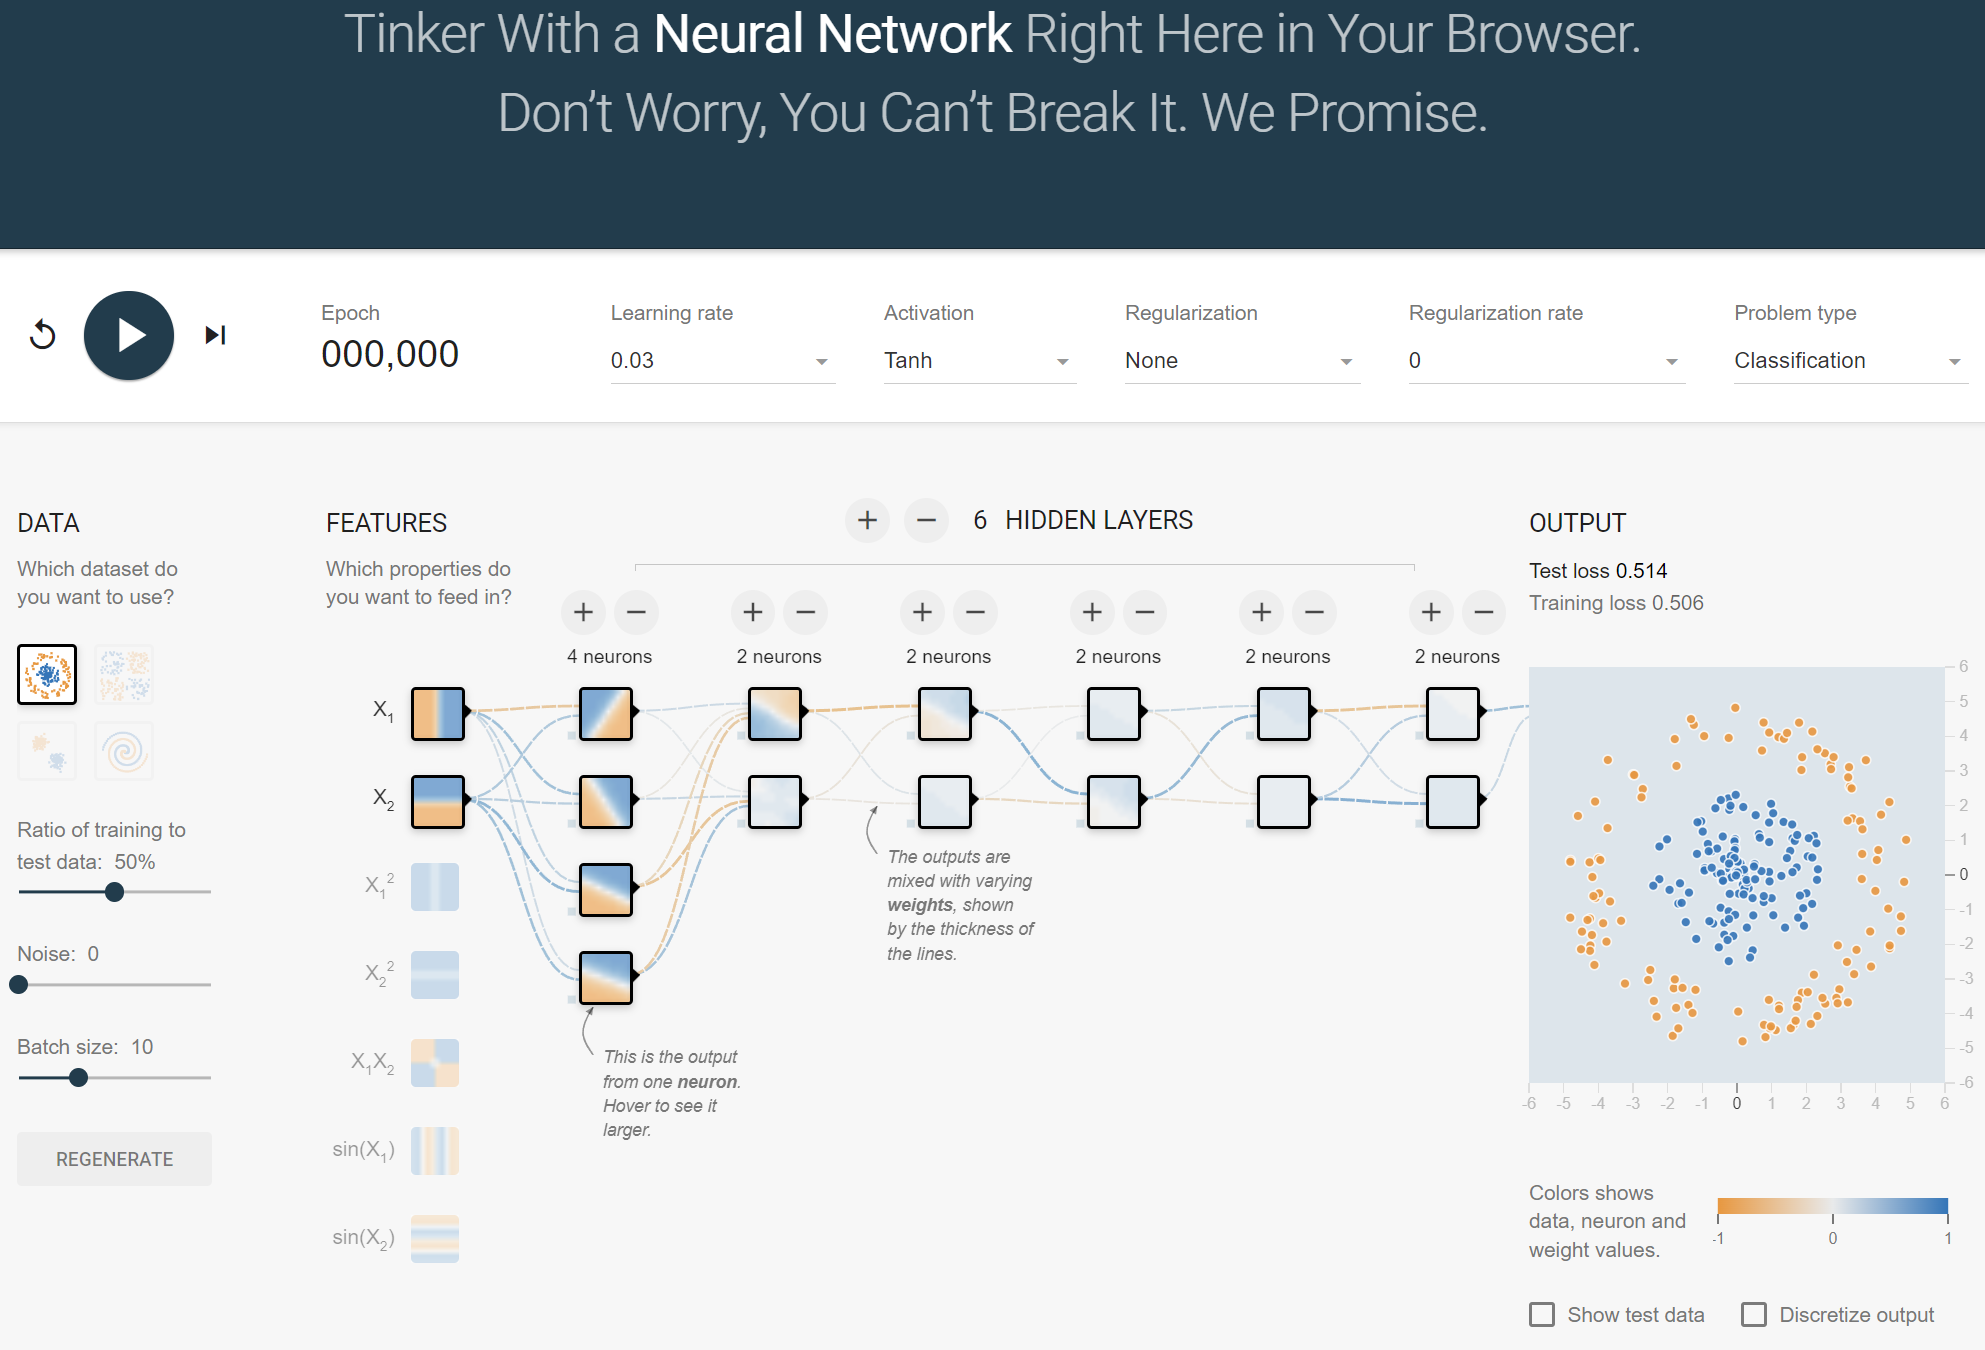

## **6.1 Code a Simple Neural Network Model [14pts, autograded]**

PyTorch is a powerful and flexible deep learning framework widely used for building, training, and experimenting with neural networks. Its key feature is the dynamic computational graph, which allows the network architecture to be modified on-the-fly during execution, making debugging and experimentation easier compared to static graph frameworks. PyTorch’s **Autograd** module automatically handles the computation of gradients during the backpropagation process, which is crucial for training neural networks. With native support for GPU acceleration, it enables fast computation of tensor operations, speeding up the training process for large-scale models. These features, combined with its user-friendly interface and extensive ecosystem, make PyTorch ideal for both research and real-world applications.

We will use it to build a simple 2 hidden layered neural network. Since this is a simple network, we will code and use a custom autograd. Under the hood, each primitive autograd operator is really two functions that operate on Tensors. The forward function computes output Tensors from input Tensors. The backward function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In PyTorch we can easily define our own autograd operator by defining a subclass of torch.autograd.Function and implementing the forward and backward functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

Please refer the below helpful links: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html, https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd to understand the below tasks and make them easy to code. We want to use this way of training model so that you may get an idea as to how training works under the hood. From the next homework i.e. CNNs we will use very easy version of pytorch implementation.

In [74]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(42)

In [76]:
# Firstly, we will implement a custom autograd operator.
# Note that we want to calculate output in forward pass as:
# output = input x transpose(weight) + bias

class CustomLinearFunction(torch.autograd.Function):
    """
    A custom autograd Function for a linear transformation.

    This Function computes the linear transformation in the forward pass
    and manually computes the gradients in the backward pass.

    Methods
    -------
    forward(ctx, input, weight, bias)
        Computes the linear transformation output.
    backward(ctx, grad_output)
        Computes the gradients of the loss with respect to input, weight, and bias.
    """

    @staticmethod
    def forward(ctx, input, weight, bias):
        """
        Performs the forward pass of the linear layer.

        Parameters
        ----------
        ctx : torch.autograd.FunctionContext
            A context object to save information for backward computation.
        input : torch.Tensor
            The input tensor of shape (N, in_features).
        weight : torch.Tensor
            The weight tensor of shape (out_features, in_features).
        bias : torch.Tensor
            The bias tensor of shape (out_features).

        Returns
        -------
        output : torch.Tensor
            The result of the linear transformation, shape (N, out_features).
        """
        # Save tensors input, weight and bias for backward pass
        ctx.save_for_backward(input, weight, bias)
        # TODO START: Complete the function
        # Compute the forward pass
        output = input @ weight.T + bias
        return output

        # Return the output

        # TODO END

    @staticmethod
    def backward(ctx, grad_output):
        """
        Performs the backward pass of the linear layer.

        Parameters
        ----------
        ctx : torch.autograd.FunctionContext
            The context object with saved tensors from the forward pass.
        grad_output : torch.Tensor
            The gradient of the loss with respect to the output.

        Returns
        -------
        grad_input : torch.Tensor or None
            Gradient with respect to the input, shape (N, in_features).
        grad_weight : torch.Tensor or None
            Gradient with respect to the weight, shape (out_features, in_features).
        grad_bias : torch.Tensor or None
            Gradient with respect to the bias, shape (out_features).
        """
        # Retrieve saved tensors
        input, weight, bias = ctx.saved_tensors

        # Initialize gradients to None
        grad_input = grad_weight = grad_bias = None


        # TODO START:
        # Check if each input requires gradients
        # ctx.needs_input_grad is a tuple of booleans that will check if gradient update is required
        if ctx.needs_input_grad[0]:
            grad_input = grad_output @ weight 
        
        if ctx.needs_input_grad[1]: 
            grad_weight = grad_output.T @ input
        
        if ctx.needs_input_grad[2]:
            grad_bias = grad_output.sum(0)
        

            # Compute gradient w.r.t. input

        # ctx.needs_input_grad is a tuple of booleans that will check if gradient update is required

            # Compute gradient w.r.t. weight

        # ctx.needs_input_grad is a tuple of booleans that will check if gradient update is required

            # Compute gradient w.r.t. bias

        # TODO END

        # Return gradients in the same order as inputs to forward()
        return grad_input, grad_weight, grad_bias


In [79]:
# Next we will have to build a custom linear layer

class CustomLinear(nn.Module):
    """
    A custom linear layer module using the CustomLinearFunction.

    This module defines a linear transformation with simplified parameter initialization
    and uses the custom autograd function for forward and backward computations.

    Parameters
    ----------
    in_features : int
        Size of each input sample.
    out_features : int
        Size of each output sample.

    Attributes
    ----------
    weight : torch.nn.Parameter
        The learnable weights of the module of shape (out_features, in_features).
    bias : torch.nn.Parameter
        The learnable bias of the module of shape (out_features).

    Methods
    -------
    reset_parameters()
        Initializes the weights and bias with a simplified method.
    forward(input)
        Applies the linear transformation to the input.
    """
    def __init__(self, in_features, out_features):
        super(CustomLinear, self).__init__()
        # TODO START:
        # Initializing the weights
        self.weights = nn.Parameter(torch.empty(out_features, in_features))

        # TODO END
        self.bias = nn.Parameter(torch.empty(out_features))
        # Initialize parameters
        self.reset_parameters()

    def reset_parameters(self):
        """
        Initializes the weights and bias of the layer.

        We use a simplified initialization where weights are sampled from a normal distribution
        and biases are initialized to zero.
        """
        # TODO START: Complete the function
        # Initialize weights with a normal distribution (mean=0, std=0.02) (hint: nn.init.normal_)
        nn.init.normal_(self.weights, mean=0, std=0.02)
        nn.init.zeros_(self.bias)
  

        # Initialize biases to zero

        # TODO END

    def forward(self, input):
        """
        Applies the custom linear transformation to the input.

        Parameters
        ----------
        input : torch.Tensor
            The input tensor of shape (N, in_features).

        Returns
        -------
        output : torch.Tensor
            The output tensor of shape (N, out_features).
        """
        # Use the custom autograd function
        # TODO START: Return a tensor with the given input and existing weight and bias.
        output = CustomLinearFunction.apply(input, self.weights, self.bias)
        return output

        # TODO END

In [78]:
# Now, we will build our NN

class CustomNeuralNetwork(nn.Module):
    """
    A simple neural network with two hidden layers using CustomLinear layers.

    This network demonstrates how to integrate the custom linear layer into a model.

    Parameters
    ----------
    input_size : int
        Number of input features.
    hidden_size1 : int
        Number of neurons in the first hidden layer.
    hidden_size2 : int
        Number of neurons in the second hidden layer.
    output_size : int
        Number of output neurons.

    Methods
    -------
    forward(x)
        Defines the forward pass of the network.
    """

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(CustomNeuralNetwork, self).__init__()
        # Define layers using the CustomLinear module
        self.layer1 = CustomLinear(input_size, hidden_size1)
        self.layer2 = CustomLinear(hidden_size1, hidden_size2)
        self.output_layer = CustomLinear(hidden_size2, output_size)

    def forward(self, x):
        """
        Defines the computation performed at every call.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor of shape (N, input_size).

        Returns
        -------
        output : torch.Tensor
            Output tensor of shape (N, output_size).
        """
        # TODO START:
        # Apply first layer and ReLU activation
        y = self.layer1(x)
        y = nn.functional.relu(y)
        y = self.layer2(y)
        y = nn.functional.relu(y)
        y = self.output_layer(y)
        y = torch.sigmoid(y)
        return y


        # Apply second layer and ReLU activation

        # Apply output layer and Sigmoid activation for binary classification

        # Return the output layer

        # TODO END

## **6.2 Fit the Neural Network on Diabetes Dataset (With only the required features in 4.2)**

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df.iloc[:, :-1].values)
y_train = train_df.iloc[:, -1].values
X_test = scaler.transform(test_df.values)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure y is of shape (N, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

input_size = X_train_tensor.shape[1]  # Number of features
hidden_size1 = 64
hidden_size2 = 32
output_size = 1

# Instantiate the neural network
model = CustomNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.001)

num_epochs = 1000

# Store your predictions in the below variable
predictions = None

for epoch in range(num_epochs):
    # TODO START:
    # Forward pass
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    
    loss = criterion(y_pred, y_train_tensor)
    
    


    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    


# Put the model in evaluation mode
model.eval()
with torch.no_grad(): 
    y_test_pred = model(X_test_tensor)


# Disable gradient computation for inference
# And take inference

# Convert predictions to numpy array
predictions_np = y_test_pred.cpu().detach().numpy().flatten()

# TODO END
y_test_pred_NN = (predictions_np >= 0.5).astype(int)

In [81]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_NN', answer = y_test_pred_NN)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **6.3 Best Model on Diabetes Dataset, and Why. [6pts, manually graded]**

Which one of Logistic Regression, Neural Network, and Decision Tree will provide the best performance on this dataset. Give reasons for your answer.

In [82]:
y_test_pred_logistic

array([0, 0, 0, ..., 1, 1, 0])

In [86]:
y_test_pred_nn = (predictions_np >= 0.5).astype(int)
y_test_pred_nn

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
y_test_pred_dt = y_test_pred_DT
y_test_pred_dt

array([0, 0, 0, ..., 0, 1, 0])

The best model for the diabetes when comparing logistic regression, decision tree, and neural network models would be the model that is able to model the complexities given by the dataset and also balancing the trend of the dataset. In this case, the best model would probably be the neural network model. Neural network observes pointwise nonlinearity in between the linear layers which helps it learn representations 
  of the data that are not linear. This is important because the diabetes dataset is not linearly separable. Furthermore, there are a lot of features that contribute to the prediction of the diabetic outcome, and the neural network model will be able to learn the weights of this feature space. After the neural network model would be the decision tree, as it is able to make scale-invariant decisions based on the features and is also invariant to null values (which the data has a lot of). Although we have addressed
  these issues with the min-max scaler and also a standard mean imputer for null values, these properties of the data still make the decision tree a good choice. The drawbacks of decision tree model against neural networks is that it is not able to model the complexities of the data as well, and can overfit specific initializations of the greedy heuristic feature selection 
  process. The decision tree also uses axis aligned splits, which only model hypothesis spaces that are linearly separable. Finally, the logistic regression model should be the least preferred model. Logistic regression models a linear decision boundary based on the features combination. Furthermore, there is regularization applied to the model, which will further simplify the model. The logistic regression model will not be able to model the complexities of the data as well as the decision tree or the neural network model.

# Submission

- Submit the notebook as a `.ipynb` file to the coding portion of the Gradescope submission. This can be done in Google Colab via the `File - Download .ipynb` menu option.